# Installing Quantstats

In [1]:
!pip install conda-repo-cli --quiet

# Importing libraries

In [2]:
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Get THE Financial market data as of yesterday for 4 different Public companies

In [66]:
Walmart = yf.download('WMT', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
Amazon = yf.download('AMZN', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
Alibaba = yf.download('BABA', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
JD = yf.download('JD', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))

Walmart.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-28,141.000000,142.649994,140.949997,142.130005,142.130005,6018000
2023-03-01,141.059998,141.279999,139.369995,140.149994,140.149994,4726700
2023-03-02,139.839996,140.740005,139.500000,140.500000,140.500000,4928500
2023-03-03,141.039993,141.190002,139.770004,140.669998,140.669998,5627900
2023-03-06,140.500000,140.979996,140.020004,140.649994,140.649994,5573200


# Add the daily return percentage to the closing price

In [67]:
Walmart['Daily_Return'] = Walmart['Close'].pct_change()
Walmart.reset_index(inplace=True)

Amazon['Daily_Return'] = Amazon['Close'].pct_change()
Amazon.reset_index(inplace=True)

Alibaba['Daily_Return'] = Alibaba['Close'].pct_change()
Alibaba.reset_index(inplace=True)

JD['Daily_Return'] = JD['Close'].pct_change()
JD.reset_index(inplace=True)



Walmart.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
1257,2023-02-28,141.000000,142.649994,140.949997,142.130005,142.130005,6018000,0.004878
1258,2023-03-01,141.059998,141.279999,139.369995,140.149994,140.149994,4726700,-0.013931
1259,2023-03-02,139.839996,140.740005,139.500000,140.500000,140.500000,4928500,0.002497
1260,2023-03-03,141.039993,141.190002,139.770004,140.669998,140.669998,5627900,0.001210
1261,2023-03-06,140.500000,140.979996,140.020004,140.649994,140.649994,5573200,-0.000142


# Plotting Daily Returns for each stock

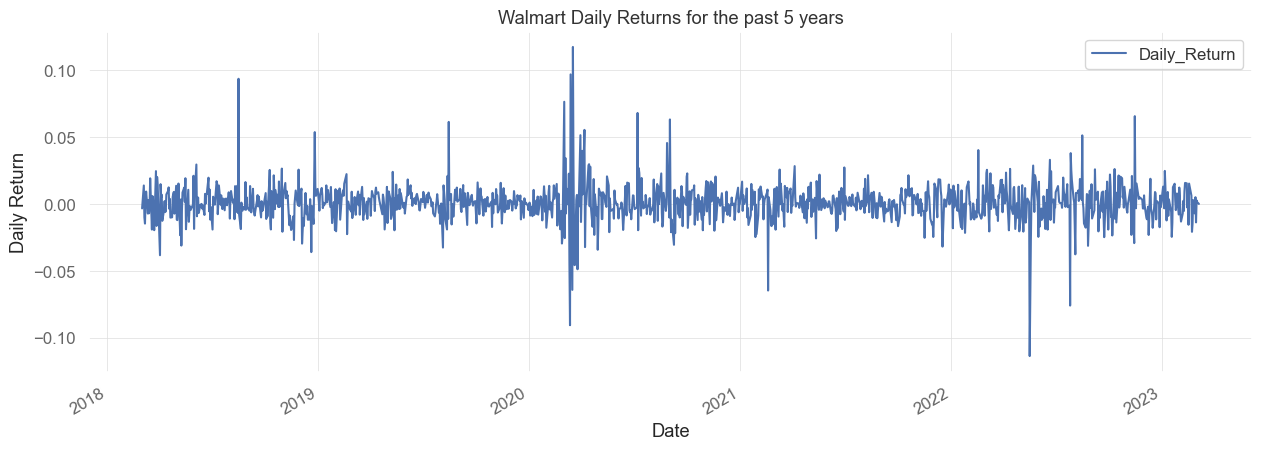

In [95]:
# Walmart

Walmart.plot(x='Date', y='Daily_Return', figsize=(15,5));
plt.title('Walmart Daily Returns for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Daily Return')

plt.show()

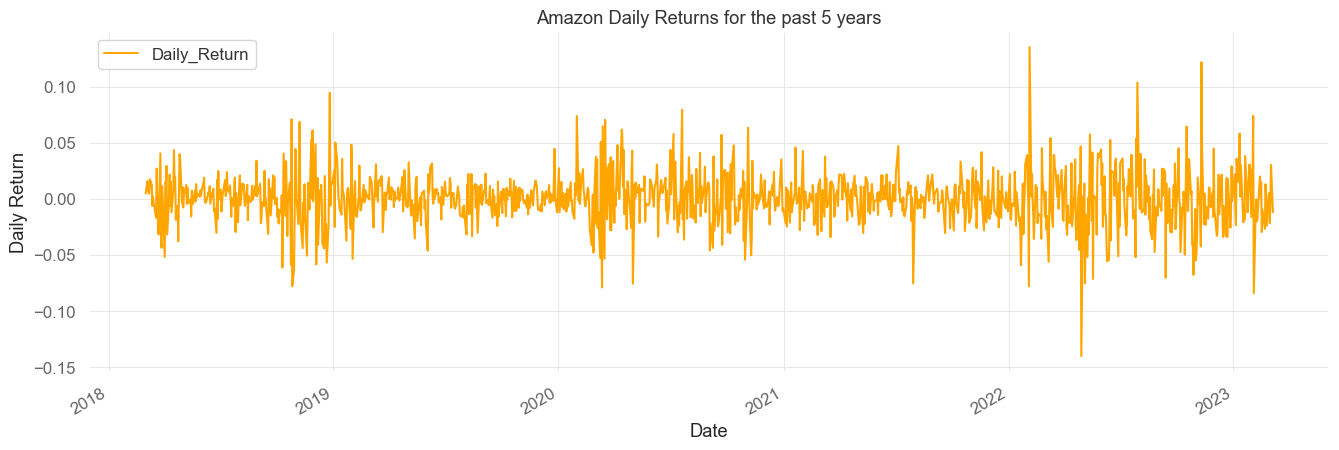

In [93]:
# Amazon

Amazon.plot(x='Date', y='Daily_Return', figsize=(16,5), color='orange');
plt.title('Amazon Daily Returns for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Daily Return')

plt.show()

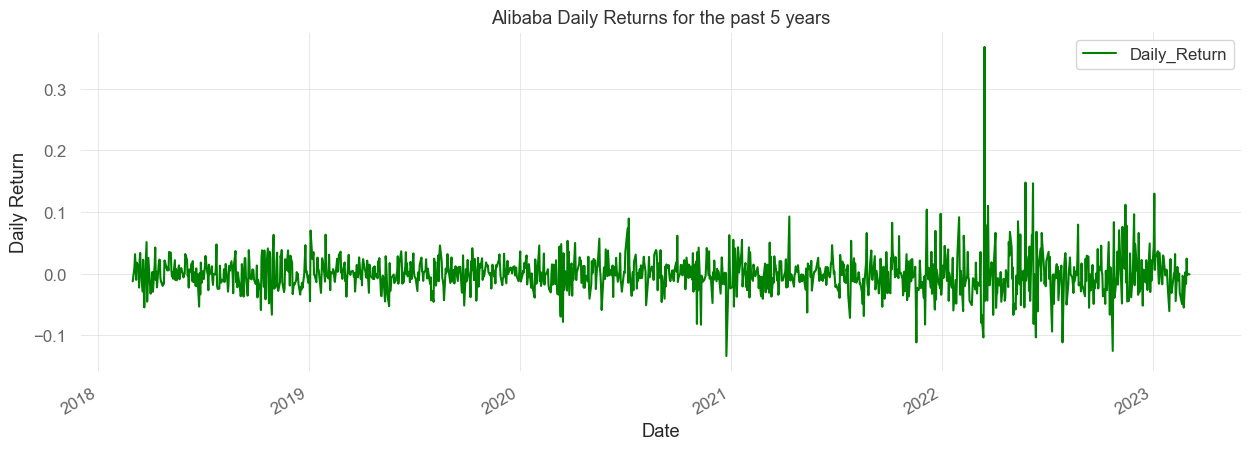

In [97]:
# Alibaba

Alibaba.plot(x='Date', y='Daily_Return', figsize=(15,5), color='green');
plt.title('Alibaba Daily Returns for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Daily Return')

plt.show()

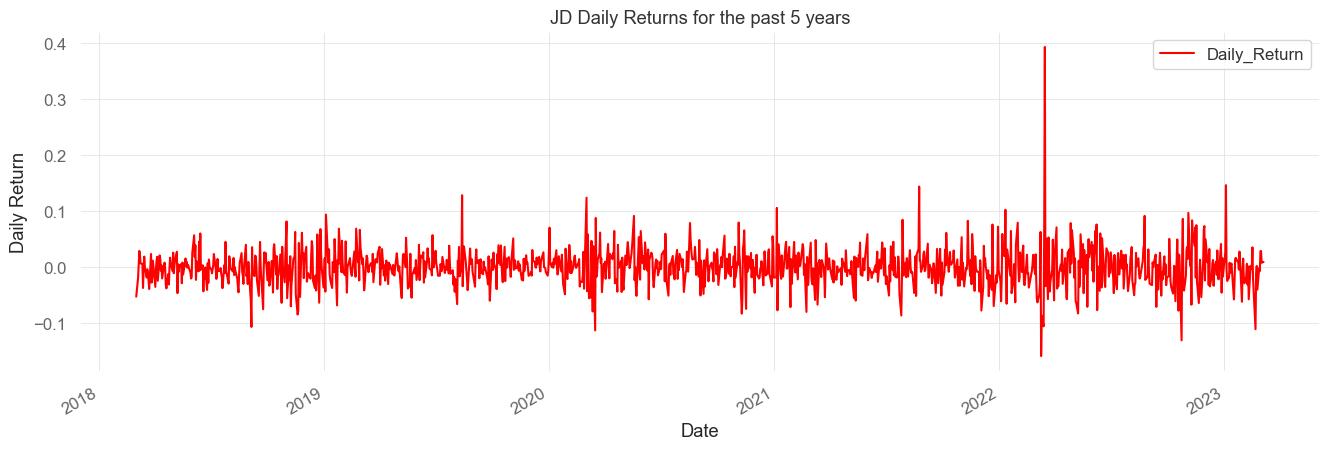

In [98]:
# JD

JD.plot(x='Date', y='Daily_Return', figsize=(16,5), color='red');
plt.title('JD Daily Returns for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Daily Return')

plt.show()

# Plotting the Adj close price for each stock

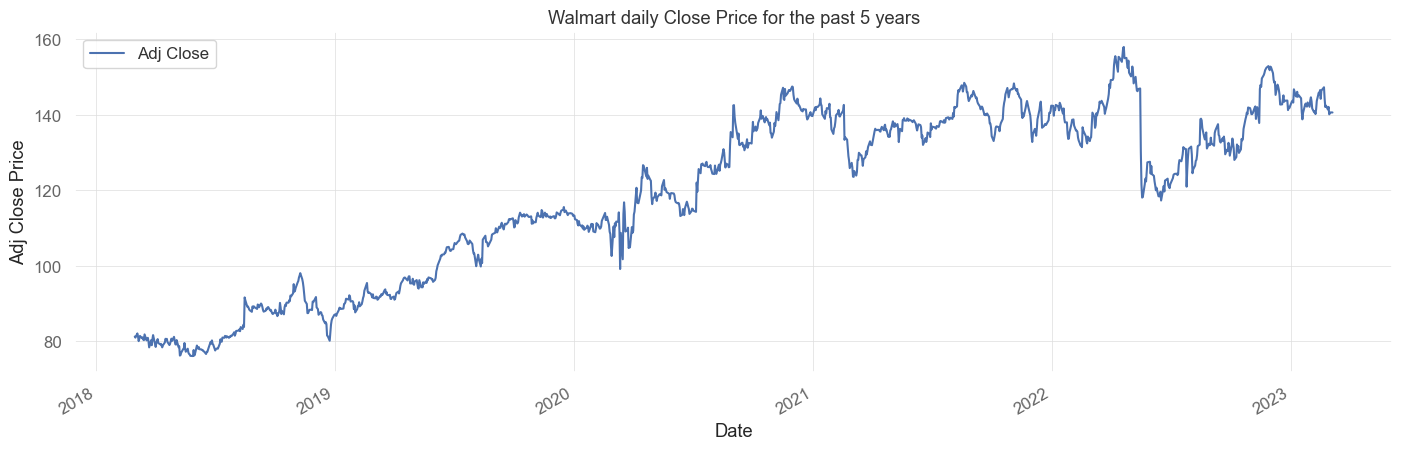

In [99]:
# Walmart

Walmart.plot(x='Date', y='Adj Close',figsize=(17,5));
plt.title('Walmart daily Close Price for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.show()

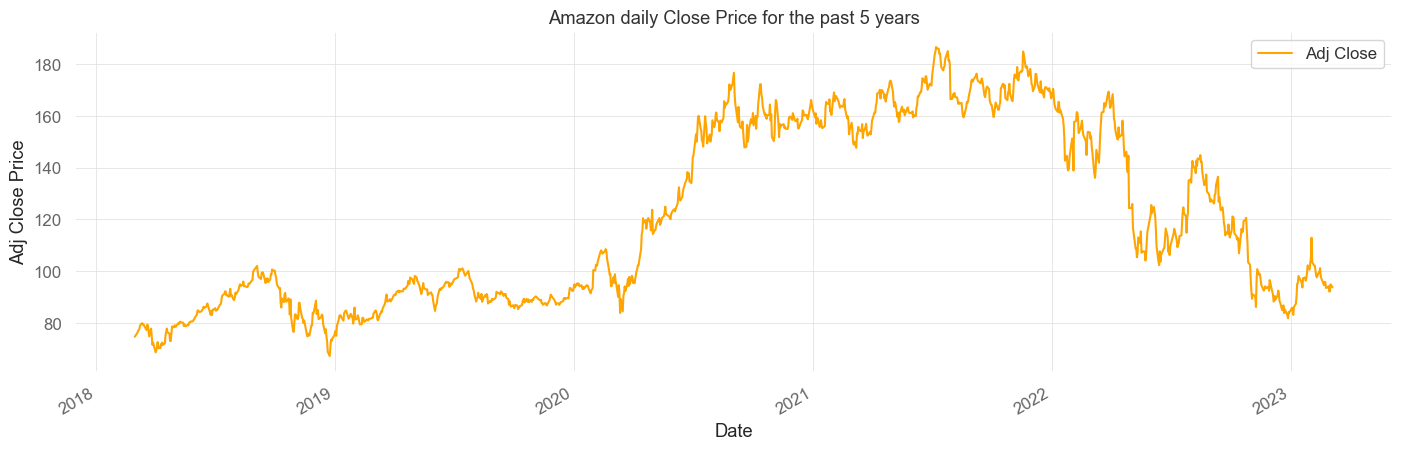

In [100]:
# Amazon

Amazon.plot(x='Date', y='Adj Close',figsize=(17,5), color='orange');
plt.title('Amazon daily Close Price for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.show()

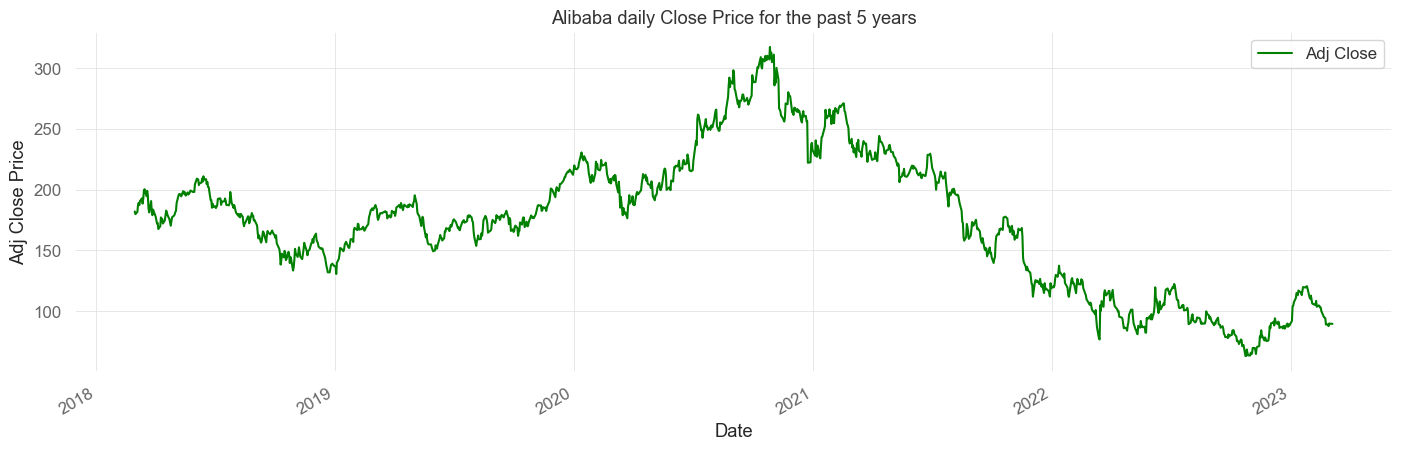

In [101]:
# Alibaba

Alibaba.plot(x='Date', y='Adj Close',figsize=(17,5), color='green');
plt.title('Alibaba daily Close Price for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.show()

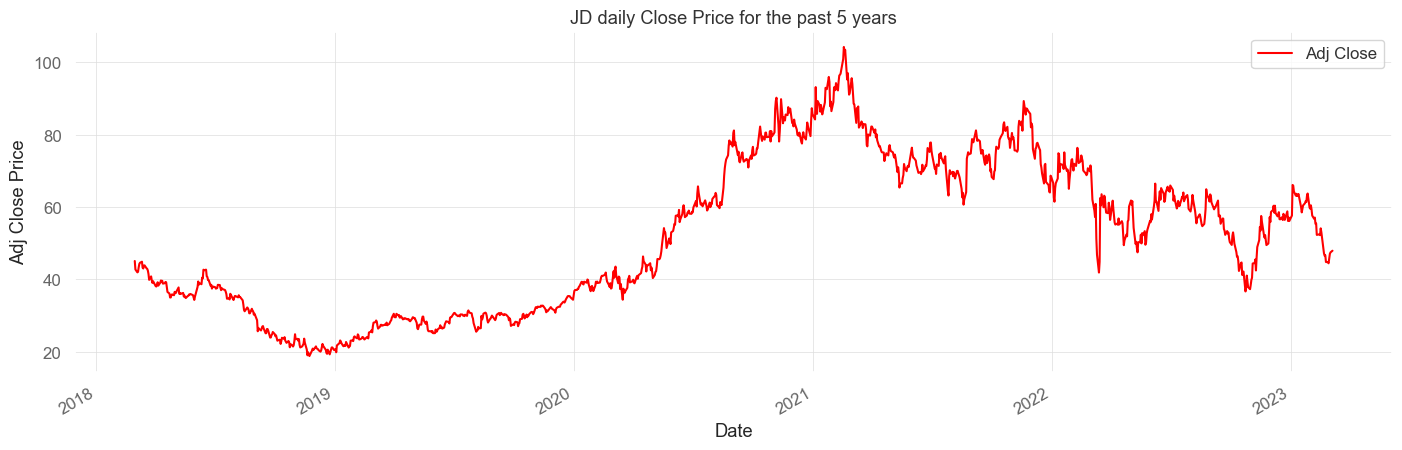

In [102]:
# JD

JD.plot(x='Date', y='Adj Close',figsize=(17,5), color='red');
plt.title('JD daily Close Price for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.show()

# Combine the Adj close price for all companies and show in one plot

In [103]:
Walmart_close = yf.download('WMT', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d')).round(2)
Amazon_close = yf.download('amzn', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d')).round(2)
Alibaba_close = yf.download('baba', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d')).round(2)
JD_close = yf.download('JD', start="2018-03-01", end=pd.Timestamp.today().strftime('%Y-%m-%d')).round(2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [104]:
Walmart_close = Walmart_close['Adj Close']
Amazon_close = Amazon_close['Adj Close']
Alibaba_close = Alibaba_close['Adj Close']
JD_close = JD_close['Adj Close']

In [105]:
adj_close = pd.concat([Walmart_close, Amazon_close, Alibaba_close, JD_close], join = 'outer', axis = 1)
adj_close.columns = ['Walmart', 'Amazon', 'Alibaba', 'JD']
adj_close.tail()

,Walmart,Amazon,Alibaba,JD
Date,,,,
2023-02-28,142.13,94.23,87.79,44.44
2023-03-01,140.15,92.17,89.95,45.73
2023-03-02,140.50,92.13,89.75,47.07
2023-03-03,140.67,94.90,89.70,47.46
2023-03-06,140.65,93.75,89.62,47.92


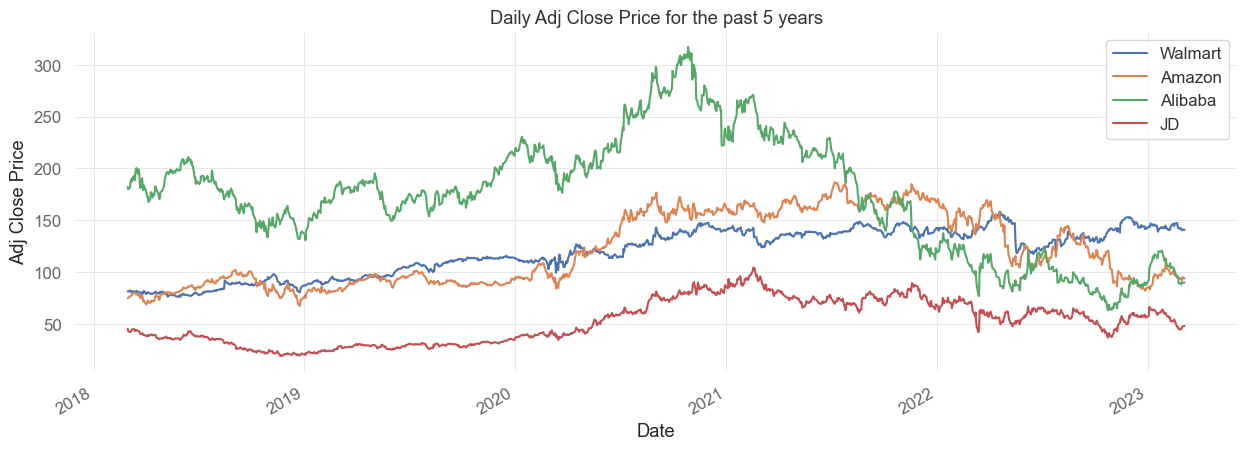

In [106]:
adj_close.plot(figsize=(15,5));
plt.title('Daily Adj Close Price for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.show()